In [1]:
import sys
sys.path.append("Mlops/src")  # so Python can find cargar_datos.py

from cargar_datos import load_data

df = load_data()
df.head()

c:\Users\jose5\trabajo-final\code_mlops-venv\Lib\site-packages\google\auth\_default.py:108: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\jose5\trabajo-final\code_mlops-venv\Lib\site-packages\google\cloud\bigquery\table.py:1994: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


,id_persona,nombre,apellido,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,2586712032,Aaron,Terry,42.0,Masculino,NYC,Bajo,1,19.41,Sí,No,Vegetariano,No,8914894420,None,Efectivo,807
1,8083396378,Aaron,Edwards,23.0,Masculino,Dallas,Bajo,0,0.00,Sí,Sí,Carnes,No,001-821-337-4847x28301,None,Tarjeta,878
2,1492119727,Aaron,Mason,24.0,Masculino,Houston,Bajo,1,8.56,No,Sí,Mariscos,No,489-471-9165,jason75@example.net,Tarjeta,924
3,9988027682,Aaron,Kennedy,24.0,Masculino,Boston,Bajo,2,7.65,No,Sí,Pescado,No,None,gonzalezryan@example.net,Efectivo,928
4,6902077458,Aaron,Gomez,26.0,Masculino,Denver,Bajo,3,11.72,No,Sí,Carnes,No,383.356.2737,None,Tarjeta,946


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_persona                 30000 non-null  Int64  
 1   nombre                     30000 non-null  object 
 2   apellido                   30000 non-null  object 
 3   edad                       29899 non-null  float64
 4   genero                     30000 non-null  object 
 5   ciudad_residencia          30000 non-null  object 
 6   estrato_socioeconomico     30000 non-null  object 
 7   frecuencia_visita          30000 non-null  Int64  
 8   promedio_gasto_comida      29855 non-null  float64
 9   ocio                       30000 non-null  object 
 10  consume_licor              30000 non-null  object 
 11  preferencias_alimenticias  28597 non-null  object 
 12  membresia_premium          30000 non-null  object 
 13  telefono_contacto          14834 non-null  obj

**Tipo de variables**

**Variables categoricas**

Ordinales

- Estrato socioeconomico


Nominales
- Genero
- Ciudad residencia
- Consume licor
- Preferencias alimenticias
- Tipo de pago mas usados
- Ocio
- Membresia premium

**Variables numericas**

Discretas
- Edad
- Frecuencia de visita

Continuas
- Ingresos mensuales
- Promedio gasto comida

**Unificar la forma como se representan los valores Nulos.**

In [3]:
!pip install numpy


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
df = df.replace(["NA", "N/A", "null", "NULL", "?", "Sin dato"], np.nan)

**Eliminacion de variables irrelevantes**

In [5]:
df = df.drop(columns=["id_persona", "nombre", "apellido", "correo_electronico", "telefono_contacto"])

Las siguientes variables fueron eliminadas del dataset por ser **irrelevantes para el análisis**:

- **id_persona**: Identificador único sin valor analítico
- **nombre**: Dato personal sin valor predictivo
- **apellido**: Dato personal sin valor predictivo
- **correo_electronico**: Dato de contacto sin valor analítico
- **telefono_contacto**: Dato de contacto sin valor analítico

Estas variables son identificadores personales que no aportan información relevante para el análisis estadístico o la generación de insights sobre el comportamiento de los clientes.

**Conversion tipo de datos**

In [7]:
df["genero"] = df["genero"].astype("category")
df["ciudad_residencia"] = df["ciudad_residencia"].astype("category")
df["estrato_socioeconomico"] = df["estrato_socioeconomico"].astype("category")
df["ocio"] = df["ocio"].astype("category")
df["consume_licor"] = df["consume_licor"].astype("category")
df["preferencias_alimenticias"] = df["preferencias_alimenticias"].astype("category")
df["membresia_premium"] = df["membresia_premium"].astype("category")
df["tipo_de_pago_mas_usado"] = df["tipo_de_pago_mas_usado"].astype("category")

In [9]:
df["edad"] = df["edad"].astype("Int64")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   edad                       29899 non-null  Int64   
 1   genero                     30000 non-null  category
 2   ciudad_residencia          30000 non-null  category
 3   estrato_socioeconomico     30000 non-null  category
 4   frecuencia_visita          30000 non-null  Int64   
 5   promedio_gasto_comida      29855 non-null  float64 
 6   ocio                       30000 non-null  category
 7   consume_licor              30000 non-null  category
 8   preferencias_alimenticias  28597 non-null  category
 9   membresia_premium          30000 non-null  category
 10  tipo_de_pago_mas_usado     30000 non-null  category
 11  ingresos_mensuales         30000 non-null  Int64   
dtypes: Int64(3), category(8), float64(1)
memory usage: 1.2 MB


**EDA**

**Analisis univariable**

In [13]:
df.describe()

,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
count,29899.0,30000.0,29855.000000,30000.0
mean,49.665006,3.896133,32.603452,5389.755867
std,23.83955,2.741532,26.402601,4538.491728
min,-5.0,-3.0,0.000000,800.0
25%,33.0,2.0,13.290000,1860.0
50%,49.0,4.0,25.510000,3402.0
75%,65.0,5.0,44.400000,7761.0
max,300.0,10.0,149.970000,17999.0


In [12]:
df_num = df.select_dtypes(include=["int64", "float64"])
df_num.agg(["mean", "median", "std", "var", "min", "max", "skew", "kurt"])

,edad,frecuencia_visita,promedio_gasto_comida,ingresos_mensuales
mean,49.665006,3.896133,32.603452,5.389756e+03
median,49.000000,4.000000,25.510000,3.402000e+03
std,23.839550,2.741532,26.402601,4.538492e+03
var,568.324125,7.515996,697.097337,2.059791e+07
min,-5.000000,-3.000000,0.000000,8.000000e+02
max,300.000000,10.000000,149.970000,1.799900e+04
skew,4.173545,-0.351820,1.418821,1.155581e+00
kurt,42.439970,0.648193,2.120485,3.148777e-01


In [15]:
# Obtener las columnas categóricas
df_cat = df.select_dtypes(include=['category']).columns

# Mostrar value_counts para cada variable categórica
for columna in df_cat:
    print(f"\n{'='*60}")
    print(f"Variable: {columna}")
    print(f"{'='*60}")
    print(df[columna].value_counts())
    print(f"\nTotal de categorías únicas: {df[columna].nunique()}")


Variable: genero
genero
Femenino     15044
Masculino    14956
Name: count, dtype: int64

Total de categorías únicas: 2

Variable: ciudad_residencia
ciudad_residencia
Chicago      5384
NYC          4769
Miami        3186
San Diego    3075
Dallas       2602
Boston       2547
Denver       2523
Houston      2212
Seattle      2191
Phoenix      1511
Name: count, dtype: int64

Total de categorías únicas: 10

Variable: estrato_socioeconomico
estrato_socioeconomico
Medio       9325
Alto        9038
Bajo        6161
Muy Alto    5476
Name: count, dtype: int64

Total de categorías únicas: 4

Variable: ocio
ocio
No    15094
Sí    14906
Name: count, dtype: int64

Total de categorías únicas: 2

Variable: consume_licor
consume_licor
Sí    18483
No    11517
Name: count, dtype: int64

Total de categorías únicas: 2

Variable: preferencias_alimenticias
preferencias_alimenticias
Carnes         7916
Vegetariano    6580
Mariscos       5212
Vegano         3267
Pescado        2983
Otro           2639
Name: co

In [16]:

!pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


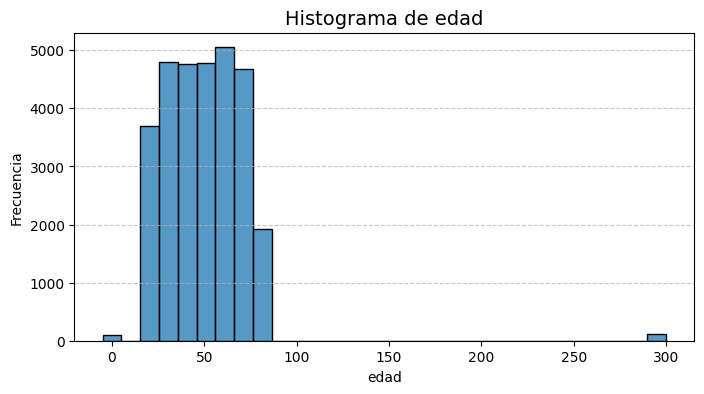

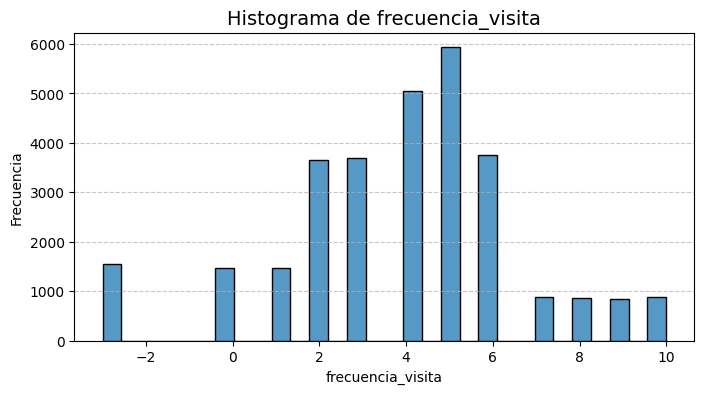

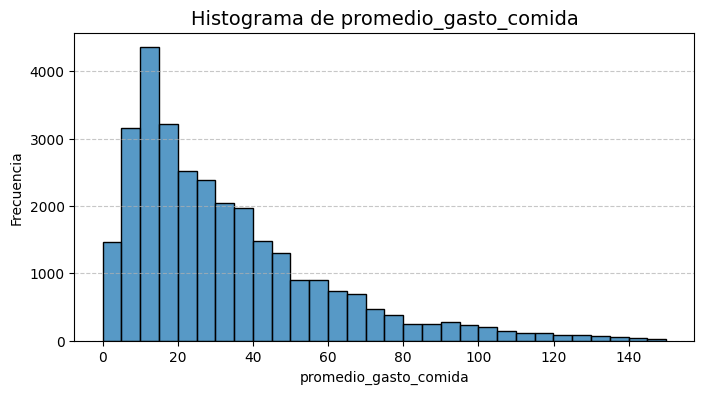

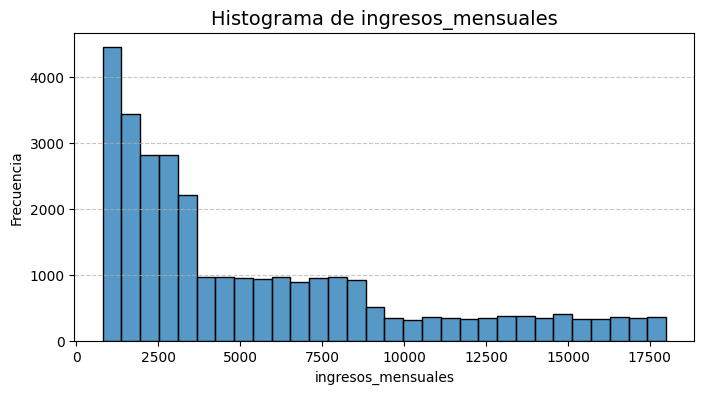

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns



# Recorrer y graficar histogramas
for col in df_num.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), bins=30)
    plt.title(f"Histograma de {col}", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

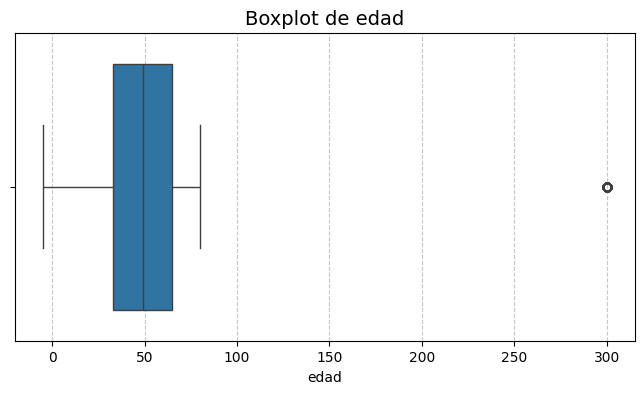

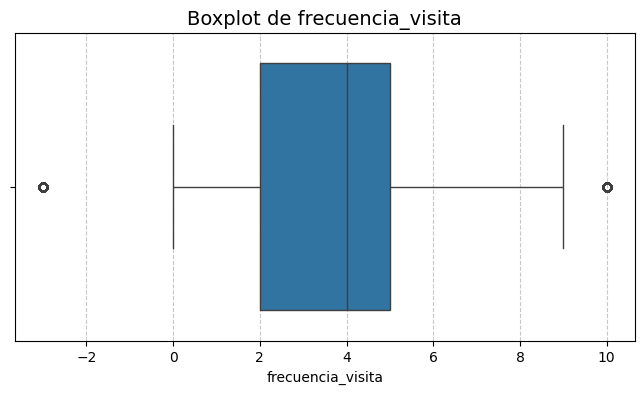

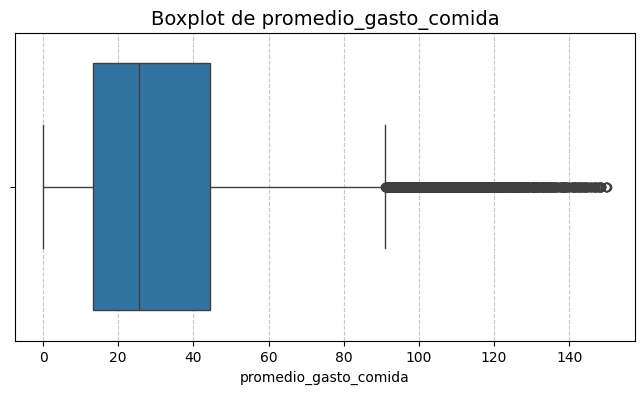

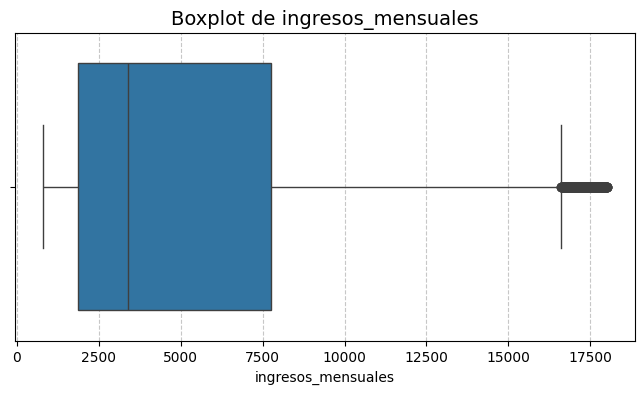

In [19]:
# Recorrer y graficar boxplots
for col in df_num.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col].dropna())
    plt.title(f"Boxplot de {col}", fontsize=14)
    plt.xlabel(col)
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

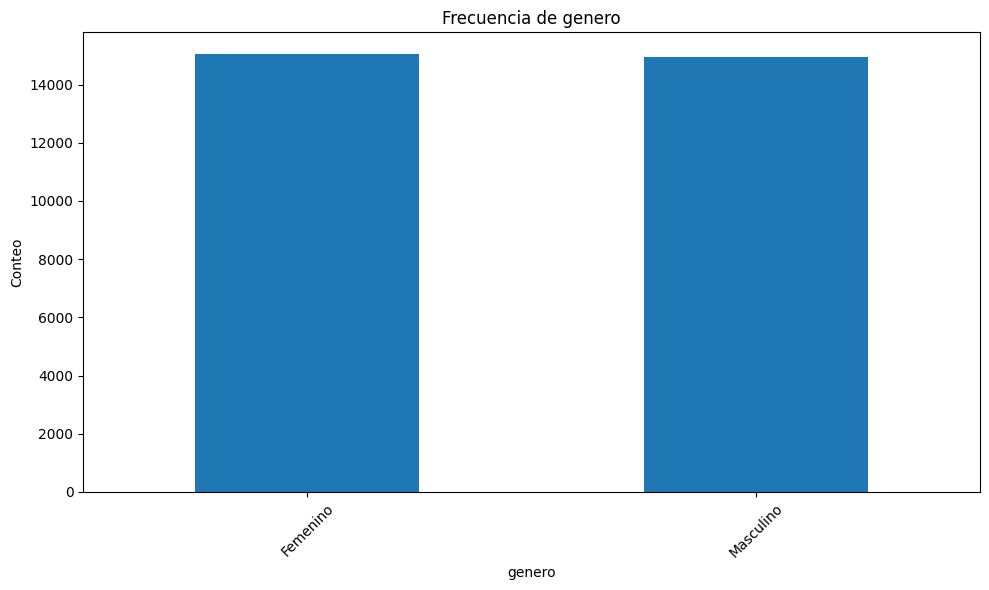

--------------------------------------------------


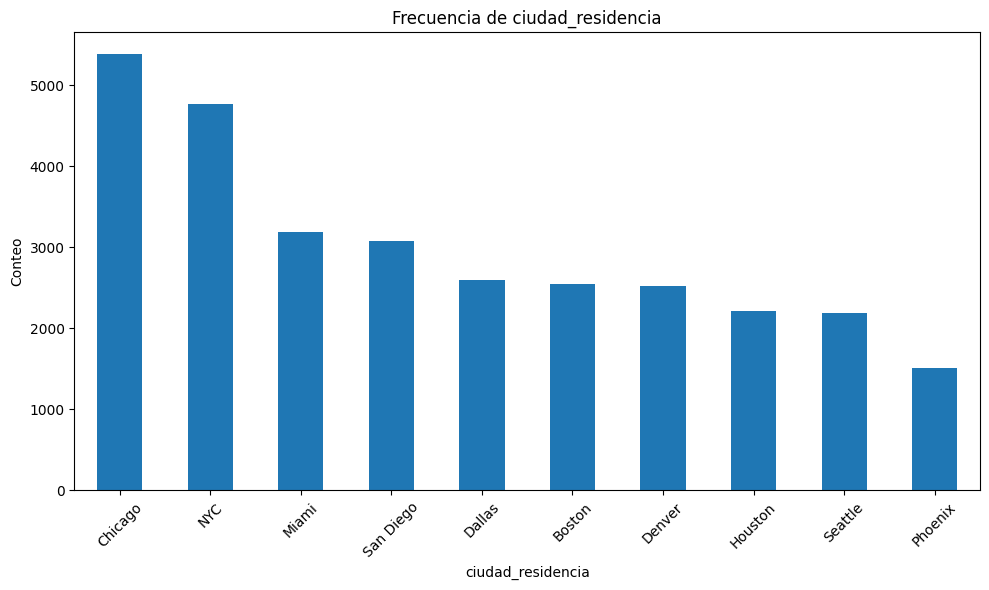

--------------------------------------------------


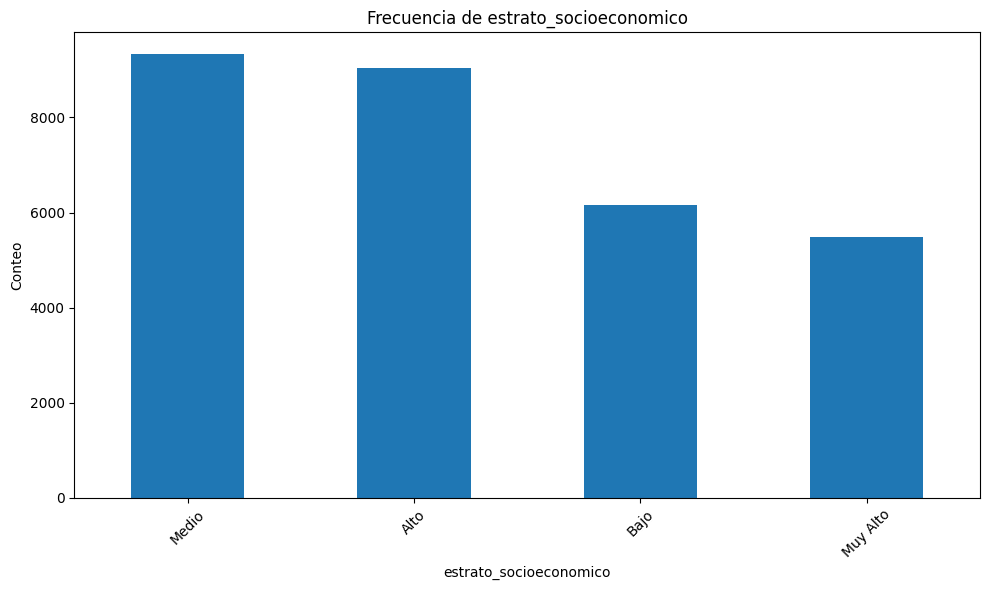

--------------------------------------------------


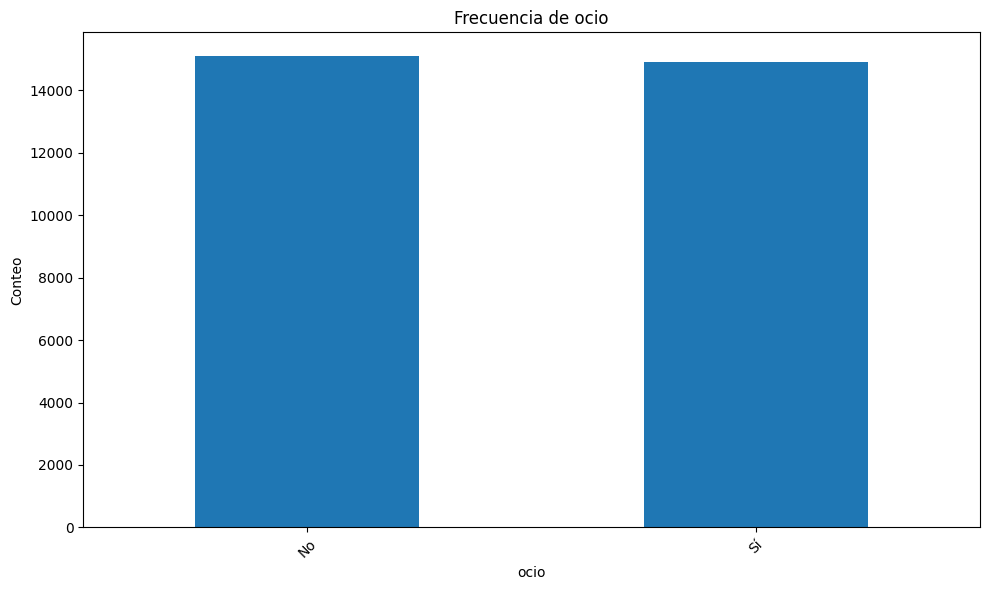

--------------------------------------------------


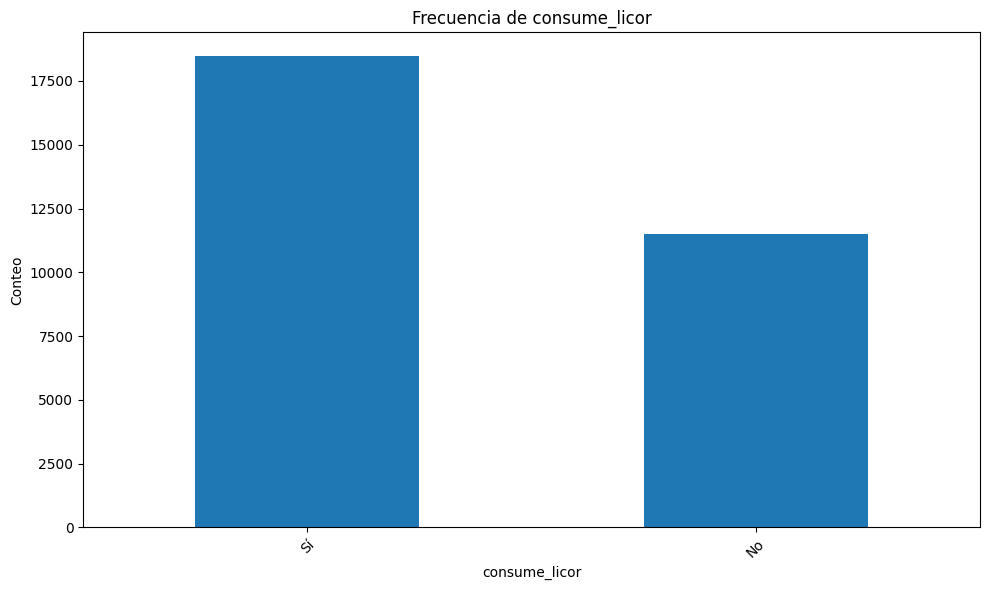

--------------------------------------------------


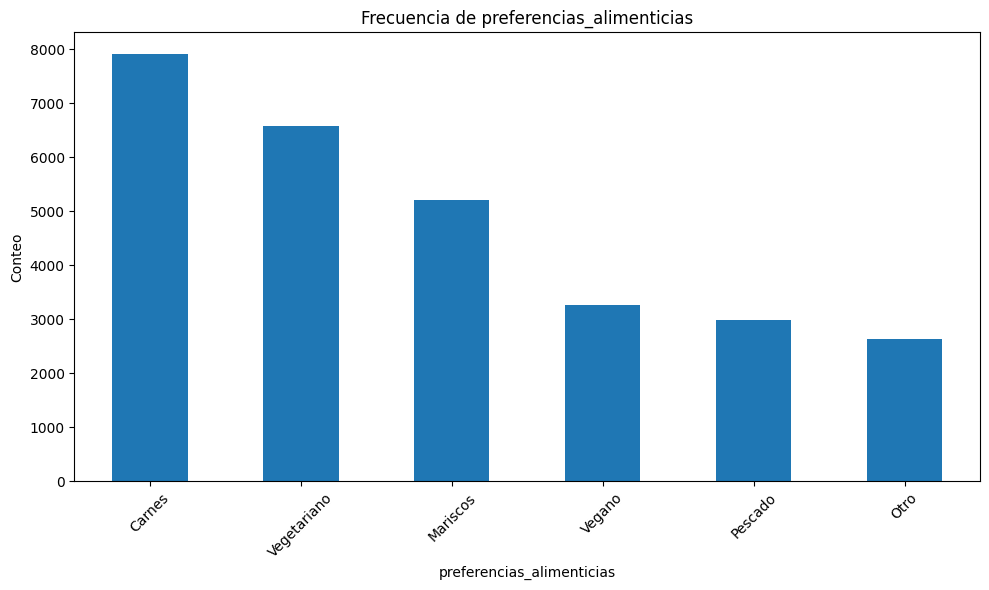

--------------------------------------------------


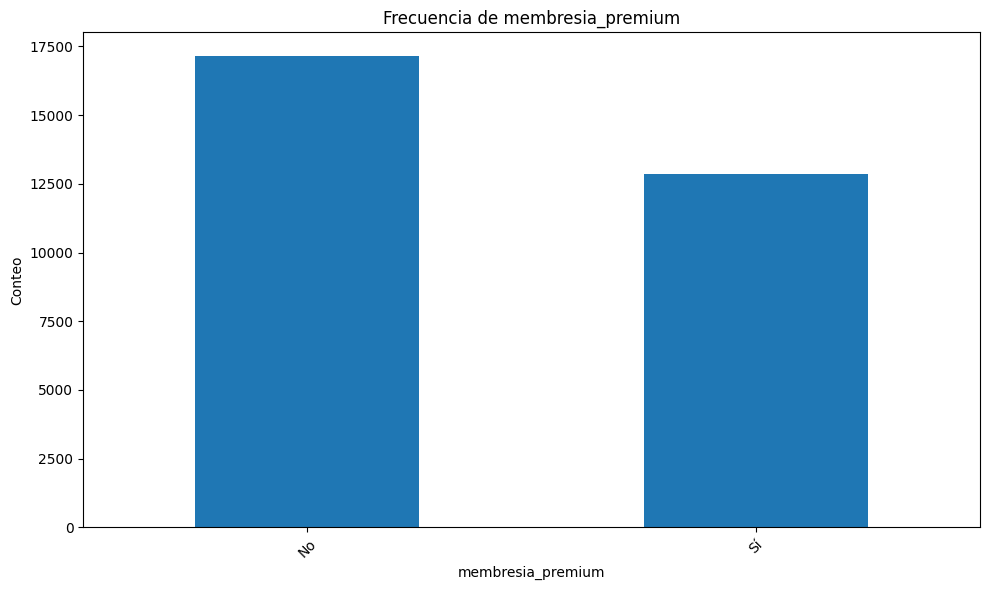

--------------------------------------------------


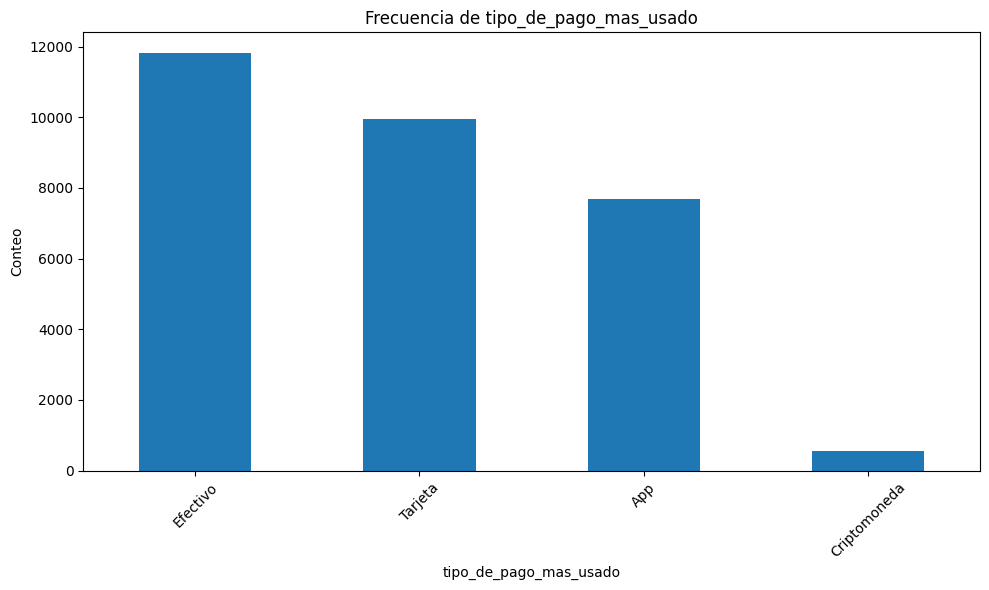

--------------------------------------------------


In [22]:
for col in df_cat:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Frecuencia de {col}")
    plt.xlabel(col)
    plt.ylabel("Conteo")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print("-" * 50)

**Analisis bivariable**

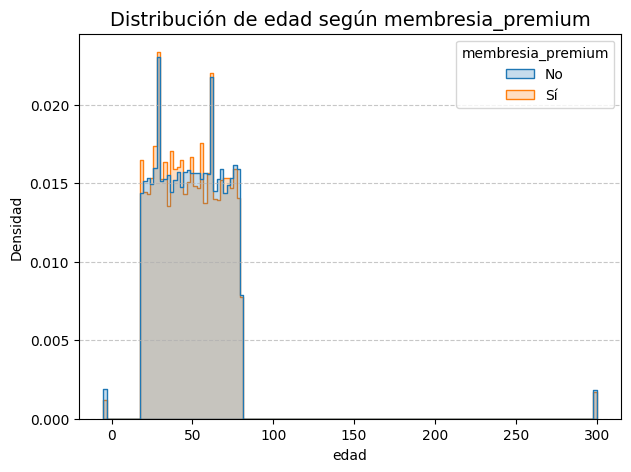

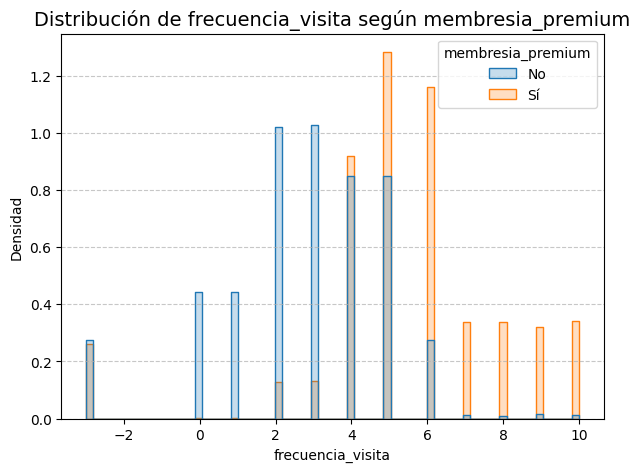

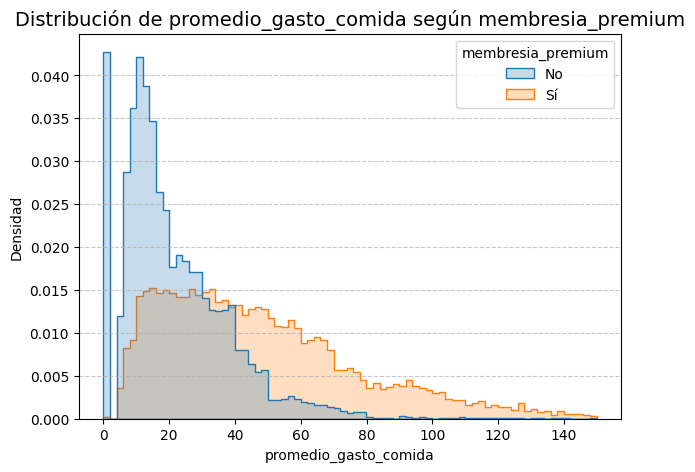

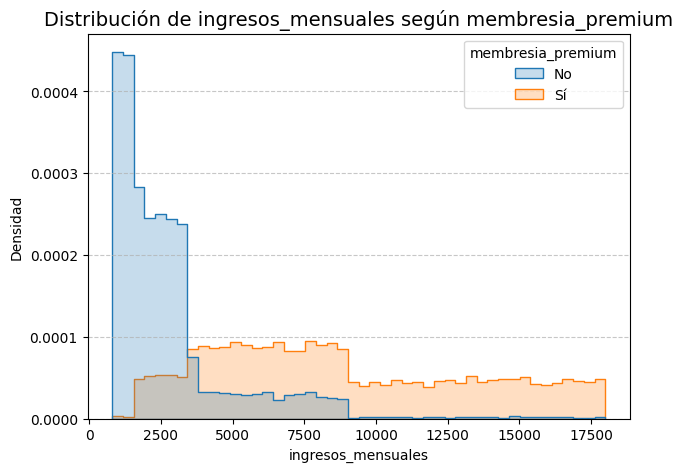

In [24]:
# Variables numéricas
for col in df_num.columns:
    plt.figure(figsize=(7,5))
    sns.histplot(data=df, x=col, hue="membresia_premium", element="step", stat="density", common_norm=False)
    plt.title(f"Distribución de {col} según membresia_premium", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Densidad")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

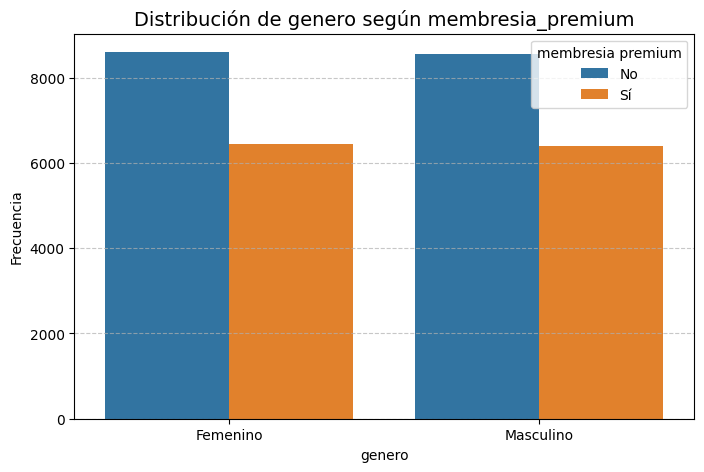

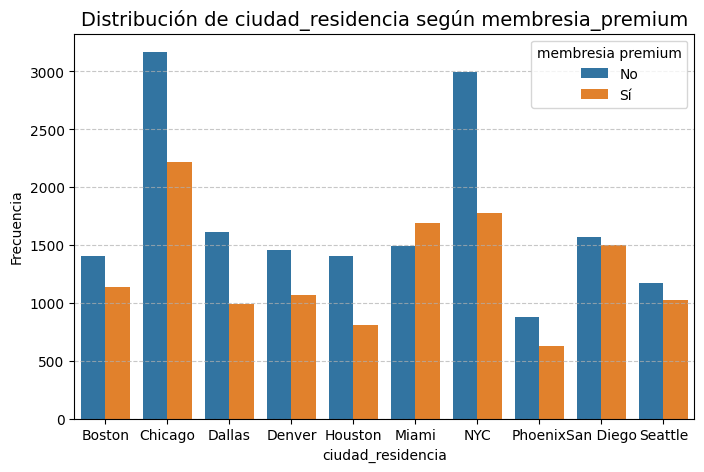

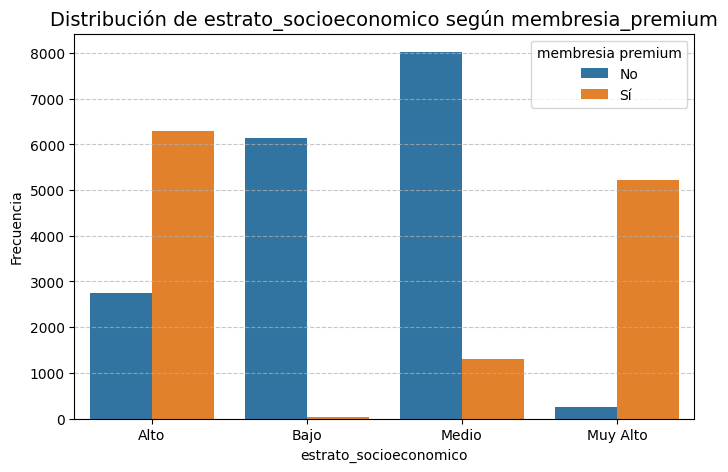

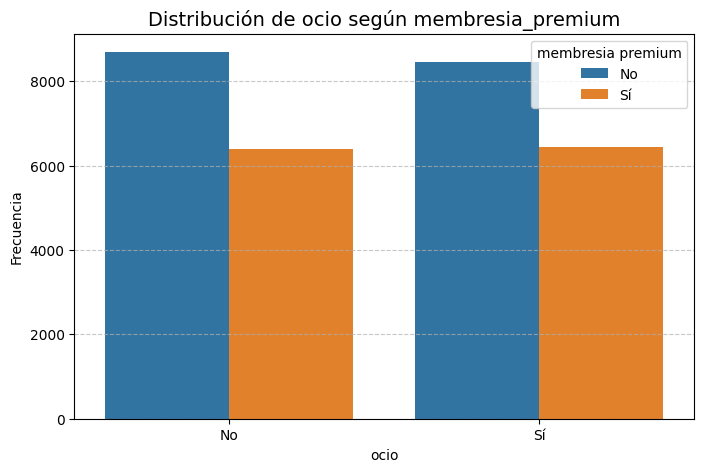

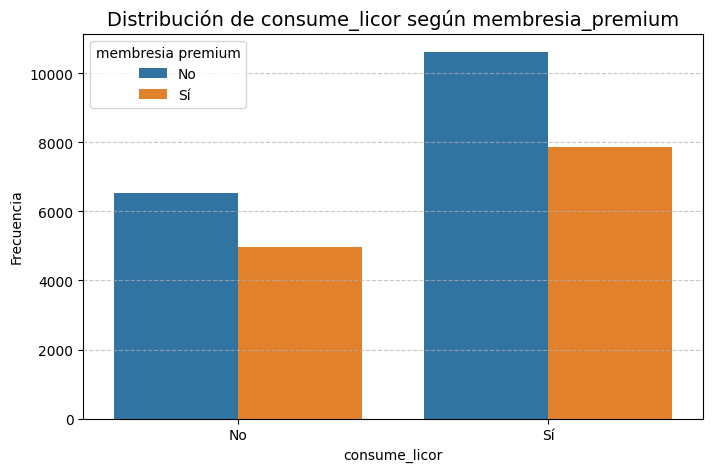

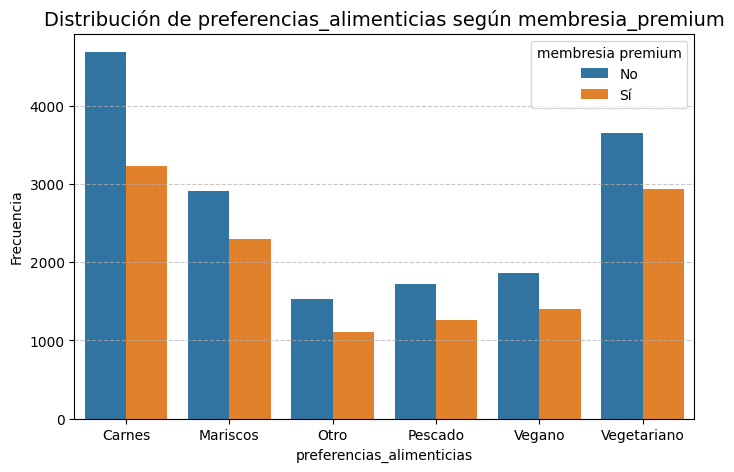

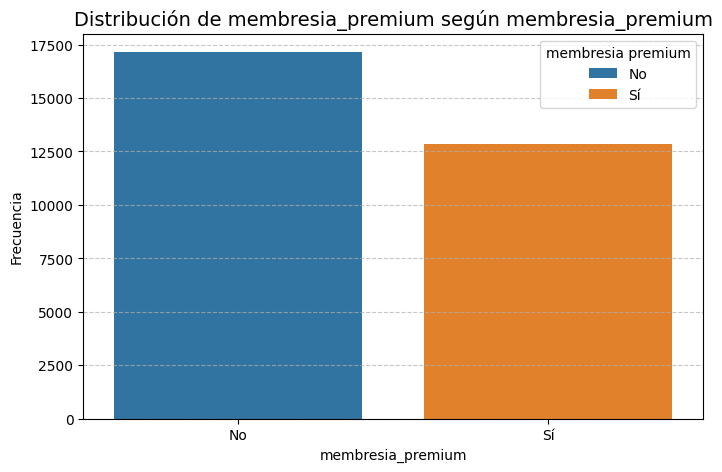

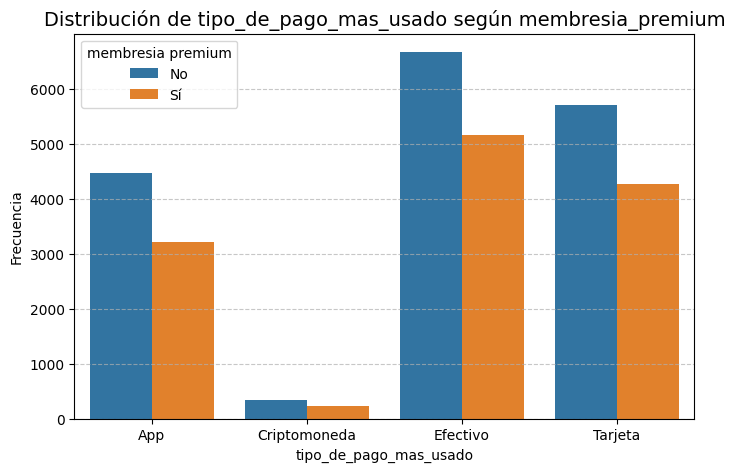

In [25]:
# Variables categóricas
# Recorrer y graficar
for col in df_cat:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, hue="membresia_premium")
    plt.title(f"Distribución de {col} según membresia_premium", fontsize=14)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.legend(title="membresia premium", labels=["No", "Sí"])
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()

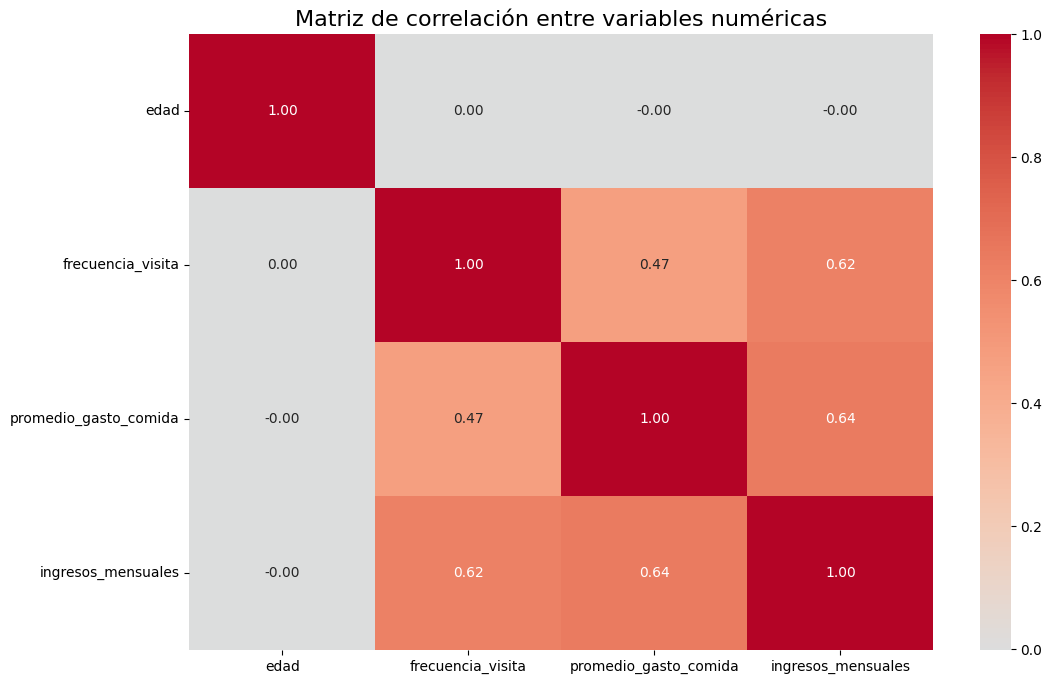

In [26]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matriz de correlación entre variables numéricas", fontsize=16)
plt.show()

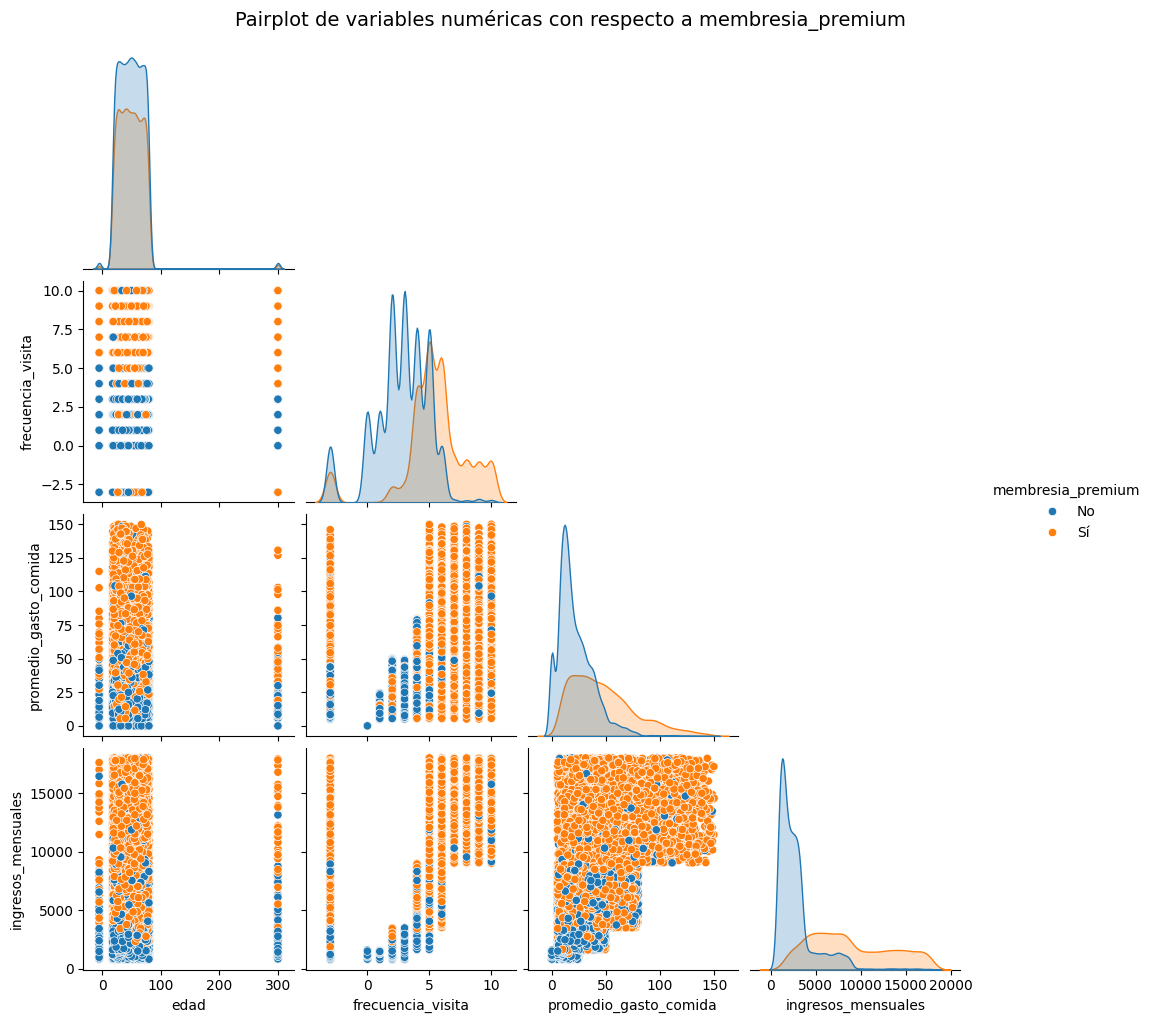

In [27]:
sns.pairplot(df, vars=["edad","frecuencia_visita","promedio_gasto_comida","ingresos_mensuales"], 
             hue="membresia_premium", diag_kind="kde", corner=True)
plt.suptitle("Pairplot de variables numéricas con respecto a membresia_premium", y=1.02, fontsize=14)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   edad                       29899 non-null  Int64   
 1   genero                     30000 non-null  category
 2   ciudad_residencia          30000 non-null  category
 3   estrato_socioeconomico     30000 non-null  category
 4   frecuencia_visita          30000 non-null  Int64   
 5   promedio_gasto_comida      29855 non-null  float64 
 6   ocio                       30000 non-null  category
 7   consume_licor              30000 non-null  category
 8   preferencias_alimenticias  28597 non-null  category
 9   membresia_premium          30000 non-null  category
 10  tipo_de_pago_mas_usado     30000 non-null  category
 11  ingresos_mensuales         30000 non-null  Int64   
dtypes: Int64(3), category(8), float64(1)
memory usage: 1.2 MB


In [ ]:
# Crear crosstabs de cada variable categórica contra membresia_premium
for columna in df_cat:
    print(f"\n{'='*80}")
    print(f"Crosstab: {columna} vs membresia_premium")
    print(f"{'='*80}")
    crosstab_pct = pd.crosstab(df[columna], df['membresia_premium'], normalize="index") * 100
    print(crosstab_pct.round(2))
    print()


Crosstab: genero vs membresia_premium
membresia_premium     No     Sí
genero                         
Femenino           57.17  42.83
Masculino          57.19  42.81


Crosstab: ciudad_residencia vs membresia_premium
membresia_premium     No     Sí
ciudad_residencia              
Boston             55.28  44.72
Chicago            58.86  41.14
Dallas             61.88  38.12
Denver             57.67  42.33
Houston            63.47  36.53
Miami              46.83  53.17
NYC                62.78  37.22
Phoenix            58.37  41.63
San Diego          51.15  48.85
Seattle            53.31  46.69


Crosstab: estrato_socioeconomico vs membresia_premium
membresia_premium          No     Sí
estrato_socioeconomico              
Alto                    30.29  69.71
Bajo                    99.56   0.44
Medio                   86.05  13.95
Muy Alto                 4.73  95.27


Crosstab: ocio vs membresia_premium
membresia_premium     No     Sí
ocio                           
No                

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   edad                       29899 non-null  Int64   
 1   genero                     30000 non-null  category
 2   ciudad_residencia          30000 non-null  category
 3   estrato_socioeconomico     30000 non-null  category
 4   frecuencia_visita          30000 non-null  Int64   
 5   promedio_gasto_comida      29855 non-null  float64 
 6   ocio                       30000 non-null  category
 7   consume_licor              30000 non-null  category
 8   preferencias_alimenticias  28597 non-null  category
 9   membresia_premium          30000 non-null  category
 10  tipo_de_pago_mas_usado     30000 non-null  category
 11  ingresos_mensuales         30000 non-null  Int64   
dtypes: Int64(3), category(8), float64(1)
memory usage: 1.2 MB


In [ ]:
from google.cloud import bigquery
import os

# --- CONFIG ---
project_id = "cdp-20252-jfvl"   # ✅ your project
dataset = "proyecto_final_cdp"
table = "restaurantes_clean"

table_id = f"{project_id}.{dataset}.{table}"


client = bigquery.Client(project=project_id)


job_config = bigquery.LoadJobConfig(write_disposition="WRITE_TRUNCATE")

# --- UPLOAD DF ---
job = client.load_table_from_dataframe(df, table_id, job_config=job_config)
job.result()  

print(f"✅ Cleaned data uploaded to BigQuery: {table_id}")



c:\Users\jose5\trabajo-final\code_mlops-venv\Lib\site-packages\google\auth\_default.py:108: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK without a quota project. You might receive a "quota exceeded" or "API not enabled" error. See the following page for troubleshooting: https://cloud.google.com/docs/authentication/adc-troubleshooting/user-creds. 
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)
c:\Users\jose5\trabajo-final\code_mlops-venv\Lib\site-packages\google\cloud\bigquery\_pandas_helpers.py:484: FutureWarning: Loading pandas DataFrame into BigQuery will require pandas-gbq package version 0.26.1 or greater in the future. Tried to import pandas-gbq and got: No module named 'pandas_gbq'
  warnings.warn(
c:\Users\jose5\trabajo-final\code_mlops-venv\Lib\site-packages\google\cloud\bigquery\_pandas_helpers.py:551: UserWarning: Could not determine the type of columns: genero, ciudad_residencia, estrato_socioeconomico, ocio, consume_licor

✅ Cleaned data uploaded to BigQuery: cdp-20252-jfvl.proyecto_final_cdp.restaurantes_clean
